To answer our questions, we will be using ``vehicles.csv`` dataset which includes postings of used cars on Craigslist.

In [1]:
# mount your drive to be access your files.
# from google.colab import drive
# drive.mount('/content/drive')

# Commenting these out since I run the notebook locally

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset
cars = pd.read_csv("data/vehicles.csv")

# Study the dataset
cars.head()

,id,price,year,manufacturer,model,odometer,transmission,type,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,32742.0,other,other,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,93600.0,automatic,sedan,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,87046.0,automatic,SUV,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,190000.0,automatic,pickup,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,116000.0,automatic,pickup,2020-12-01T12:53:56-0600


# Question 1

Create 2 subplots below that show:
1. the proportions of car types (on the left)
2. the frequencies of transmission types (on the right).

![plot1.jpg](https://drive.google.com/uc?id=1XGh0VMG-ihRcFIECvp75DKFf1vXmSDk1)

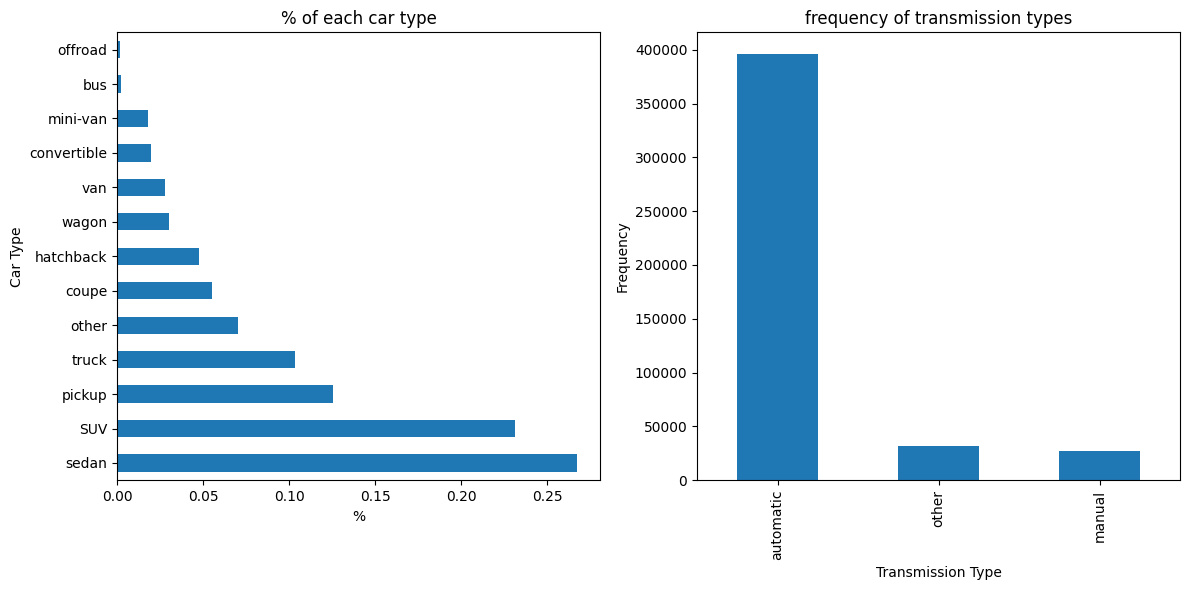

In [6]:
#answer here
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting car types proportion
car_types = cars['type'].value_counts(normalize=True).sort_values(ascending=False)
car_types.plot(kind='barh', ax=ax[0])
ax[0].set_title('% of each car type')
ax[0].set_xlabel('%')
ax[0].set_ylabel('Car Type')

# Plotting transmission types frequency
transmission = cars['transmission'].value_counts()
transmission.plot(kind='bar', ax=ax[1])
ax[1].set_title('frequency of transmission types')
ax[1].set_xlabel('Transmission Type')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Question 2

Using a historgram, visualize the distribution of the prices of used cars that have been driven for at most 100 miles.

What do you notice? What does that tell you about the data?

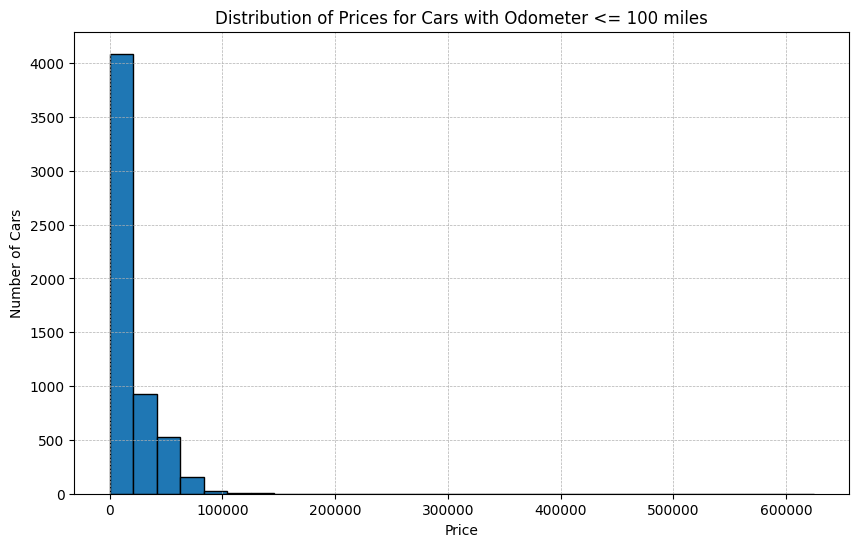

In [11]:
#answer here
# Filtering data
filtered_cars = cars[cars['odometer'] <= 100]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_cars['price'], bins=30, edgecolor='black')
plt.title('Distribution of Prices for Cars with Odometer <= 100 miles')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Question 3

Create a box plot to observe the differences in price ranges amongst the top 3 manufacturers. To improve visibility, zoom into the plot to exclude any outliers over the price of 100,000.

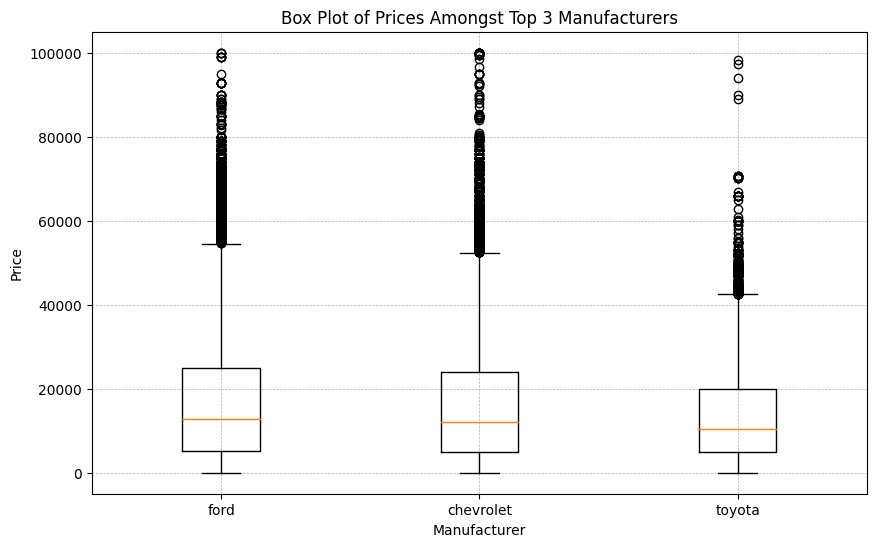

In [12]:
#answer here
# Identifying the top 3 manufacturers by count
top_3_manufacturers = cars['manufacturer'].value_counts().head(3).index

# Filtering cars by the top 3 manufacturers and prices <= 100,000
filtered_cars = cars[(cars['manufacturer'].isin(top_3_manufacturers)) & (cars['price'] <= 100000)]

# Plotting
plt.figure(figsize=(10, 6))
box_data = [filtered_cars[filtered_cars['manufacturer'] == manufacturer]['price'] for manufacturer in top_3_manufacturers]
plt.boxplot(box_data, labels=top_3_manufacturers, vert=True)
plt.title('Box Plot of Prices Amongst Top 3 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Question 4

Create a heatmap to show the relationship between the car's price and its year of manufacture, for all cars produced in the last 10 years.

Exclude cars that are priced over 30,000 and at 0.

What's a good bin size for this particular visualization?


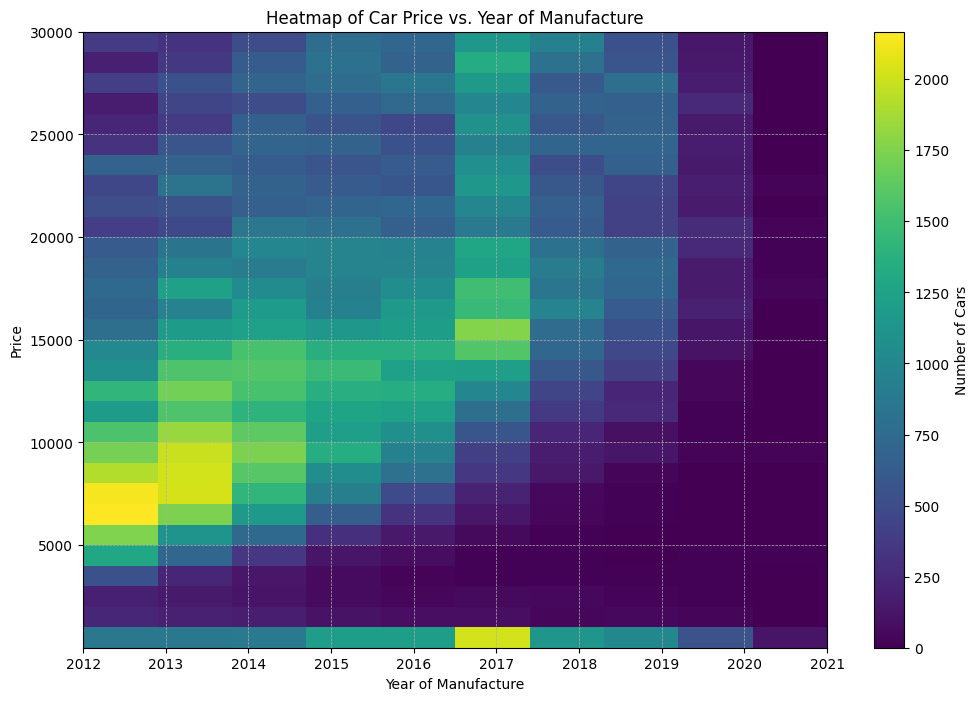

In [13]:
#answer here
# Filtering data
current_year = cars['year'].max()
filtered_cars = cars[
    (cars['year'] > current_year - 10) &
    (cars['price'] <= 30000) &
    (cars['price'] > 0)
]

# Creating heatmap
plt.figure(figsize=(12, 8))
hist = plt.hist2d(
    filtered_cars['year'], 
    filtered_cars['price'], 
    bins=[10, 30], # 10 bins for years, 30 bins for price (approximating $1,000 increments)
    cmap='viridis'
)
plt.colorbar(hist[3], label='Number of Cars')
plt.title('Heatmap of Car Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()